In [1]:
%matplotlib inline


from IPython.core.display import HTML
from IPython.display import IFrame

# imports a bunch of 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras import initializers
import os
import sys


from IPython.display import IFrame
from IPython.display import HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# What is Machine Learning?
* “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 
* “Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.
* “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University
* Machine learning research is part of research on artificial intelligence, seeking to provide knowledge to computers through data, observations and interacting with the world. That acquired knowledge allows computers to correctly generalize to new settings.
* “Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.”

# Machine Learning Basic Concepts

## Representations
* A set of classifers or the language that a computer understands
* How the model connects data to the objective
**The way humans make inference from data is different than machines**

Examples: 

* K-nearest neighbors
* support vector machines
* decision trees
* neural networks
* ...

**The way humans make inference from data is different than machines**

## Evaluation

how the model determines its success at completing an objective


**The ways humans and computers quantify success at an objective is very different**


Examples: 
* accuracy/error rate
* squared error
* likelihood
* k-l divergence (entropy between two distributions)
* ...

# Optimization

* The model search method
* How the model improves itself
* How the model values exploration vs. exploitation


**The way that humans and computers optimize and solve problems is very different**

Examples: 
* Combinatorial optimization
* Random search
* Greedy search
* Continuous optimization
* Gradient descent
* Quasi-Newton method

![figure](https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/Componets_of_a_learning_algorithm.png?raw=1)

In [ ]:
IFrame(src='http://www.r2d3.us/visual-intro-to-machine-learning-part-1/', width=1000, height=800)

# How we get machines to learn
* Choose the best learning algorithm

Other things that matter
* Collect and collate meaningful data
* Provide the data to the machine in a form that emphasizes the learning objective

**It is not just about solving problems or doing thing. Machines that learn are useful to humans because with all of their processing power they are able to highlight patterns in big data that would have otherwise been missed**

# Challenges and Limitations

## Overfitting
![figure](https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/Explaining_Overfitting.png?raw=1)
* It is possible to get perfect accuracy on a test set but have no ability to conduct inference on a new problem 
* The model is not **generalizable**
I can classify types of apples but show me an orange and I am useless

# Overfitting Example with Polynomials

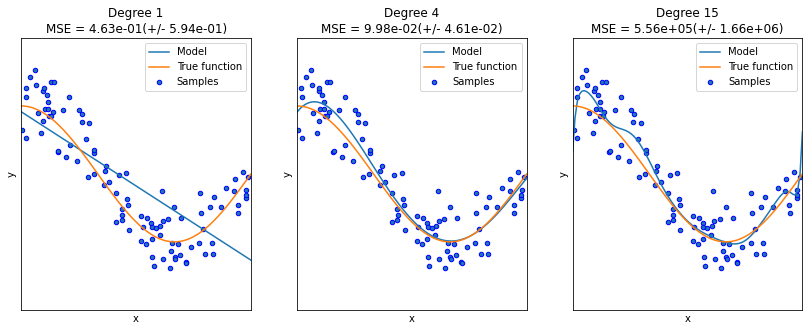

In [2]:
# Defines the function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# sets a random seed for consistent plotting
np.random.seed(0)

# sets the number of samples
n_samples = 100

# Sets the range in degrees
degrees = [1, 4, 15]

# adds some noise to the data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

# does the plotting
plt.figure(figsize=(14, 5))

# Loops around the number of degrees selected
for i in range(len(degrees)):

    # makes the subplot
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # creates the polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    # Least squares linear regression
    linear_regression = LinearRegression()

    # estabilishes a fitting pipeline
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # does the fit
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Defines a linear vector
    X_test = np.linspace(0, 1, 100)

    # plots the real model
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")

    # plots the generated data
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    # sets the axies format
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# Problems with Generalization
## Overfitting
* Your model is way more complex than the problem you have

# A Simple Linear Neural Network
## Conducting a linear fit with a single layer Neural Network

In [ ]:
# function that makes movies
def make_movie(pathIn, pathOut, fps):

    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    # for sorting the file names properly
    files.sort(key=lambda x: x[5:-4])
    files.sort()
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    # for sorting the file names properly
    files.sort(key=lambda x: x[5:-4])

    for i in range(len(files)):
        filename = pathIn + files[i]
        # reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)

        # inserting the frames into an image array
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [ ]:
# Real function
def linear_model(x):
    return 3*x + 7


# defines a vector and generates data with random noise
x = np.linspace(0, 10, 10)
y = linear_model(x) + np.random.randn(len(x)) * 1

# Builds a class for defining a simple linear neural network


class Model:

    def __init__(self, input_dim, dirName):
        self.model = Sequential()

        self.model.add(Dense(1, activation='linear', input_dim=input_dim))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName

        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory ", dirName,  " Created ")
        except FileExistsError:
            print("Directory ", dirName,  " already exists")

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                if epoch % 10 == 0:
                    plt.plot(x_train, y_train, 'o')
                    x_predict = np.linspace(
                        np.min(x_train), np.max(x_train), 100)
                    plt.plot(x_predict, self.model.predict(x_predict))
                    plt.axis([
                        x_train.min() - 0.5, x_train.max() + 0.5,
                        y_train.min() - 0.5, y_train.max() + 0.5,
                    ])
                    plt.title(f"Epoch #{epoch}")
                    plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                    plt.clf()


new_model = Model(1, 'linear_fit')
new_model.train(x, y, epochs=10000)
make_movie('./linear_fit/', './linear_fit/linear_fit.mp4', 30)

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 0s 129us/step - loss: 816.3971 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 129us/step - loss: 816.0312 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 183us/step - loss: 815.6654 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 189us/step - loss: 815.2996 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 189us/step - loss: 814.9337 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 180us/step - loss: 814.5681 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 292us/step - loss: 814.2028 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 160us/step - loss: 813.8375 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 444us/step - loss: 813.4725 - accuracy: 0.0000e+00
Epoch 1/1
10/1

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

## Conducting a linear fit with a single layer Neural Network

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wa15HLi4kMI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/joshuaagar/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## What do you think happens when we make this network wider and deeper?

## Linear Fitting with a Deep Neural Network

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        
        # builds a deeper NN
        self.model = Sequential()
        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName

        # Makes the directory to save the files
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory ", dirName,  " Created ")
        except FileExistsError:
            print("Directory ", dirName,  " already exists")

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train), np.max(x_train), 100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                    x_train.min() - 0.5, x_train.max() + 0.5,
                    y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

Directory  deep_linear_fit  Created 
Epoch 1/1
10/10 [==============================] - 0s 18ms/step - loss: 572.4329 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 310us/step - loss: 567.6191 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 358us/step - loss: 564.3314 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 255us/step - loss: 561.2308 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 263us/step - loss: 558.3478 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 274us/step - loss: 555.0949 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 247us/step - loss: 551.7656 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 335us/step - loss: 548.4081 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 199us/step - loss: 544.8489 - accuracy: 0.0000e+00
Epoch 1/1
10/10 [==

SystemError: ignored

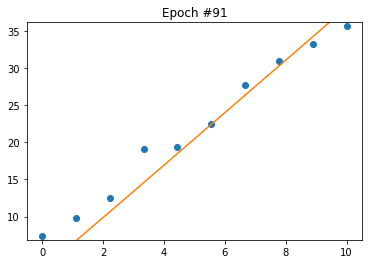

In [ ]:
new_model = Model(1, 'deep_linear_fit')
new_model.train(x,y, epochs = 1000)
make_movie('./deep_linear_fit/', './deep_linear_fit/deep_linear_fit.mp4', 20)

## Linear Fitting with a Deep Neural Network

In [ ]:
HTML('<iframe width="800" height="600" src="https://www.youtube.com/embed/j3hMh7hzTic" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Application to more complex functions
## Linear fit to a sine 

### What will happen if we train a single layer neural network on a data following a sine function?

### Code

In [3]:
# Function to make a sine function
def sine(x):
    return np.sin(x) 

# creates a linear space vector from -3 to 3 
x = np.linspace(-3,3,25)
# adds some random noise to the sine function
y = sine(x) + np.random.randn(len(x)) * 0.15

Directory  linear_fit  Created 


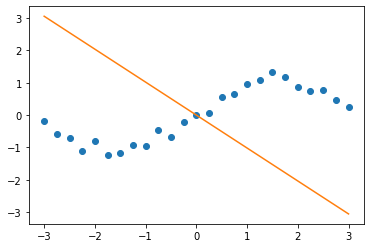

In [4]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(1, activation='linear', input_dim=input_dim))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                if epoch % 10 == 0:
                    plt.plot(x_train, y_train, 'o')
                    x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                    plt.plot(x_predict, self.model.predict(x_predict))
                    plt.axis([
                       x_train.min() - 0.5, x_train.max() + 0.5,
                       y_train.min() - 0.5, y_train.max() + 0.5,
                    ])
                    plt.title(f"Epoch #{epoch}")
                    plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                    plt.clf()
                
# Defines the model                
new_model = Model(1, 'linear_fit')

# Trains the model
new_model.train(x,y, epochs = 1, save_imgs = False)
plt.plot(x, y, 'o')

# computes the prediction
x_predict = np.linspace(np.min(x),np.max(x),100)
plt.plot(x_predict, new_model.model.predict(x_predict))

# What happens when we make this network deeper? 

### Code

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                   x_train.min() - 0.5, x_train.max() + 0.5,
                   y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

In [ ]:
new_model = Model(1, 'deep_sine_fit')
new_model.train(x,y, epochs = 1000)
make_movie('./deep_sine_fit/', './deep_sine_fit/deep_sine_fit.mp4', 20)

In [ ]:
HTML('<iframe width="800" height="700" src="https://www.youtube.com/embed/P-vVExENCWs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# A Very Very Simple Way to Prevent Overfitting
![figure](https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/dropout.png?raw=1)
<cite data-cite="7099837/98IS3JJH"></cite>

### Code for Adding Dropout

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4)) #These are dropout layers
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                   x_train.min() - 0.5, x_train.max() + 0.5,
                   y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

Directory  deep_sine_fit_dropout  Created 
Epoch 1/1
25/25 [==============================] - 0s 10ms/step - loss: 0.6532 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 112us/step - loss: 0.5744 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 99us/step - loss: 0.5510 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 106us/step - loss: 0.6040 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 103us/step - loss: 0.5537 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 113us/step - loss: 0.6437 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 112us/step - loss: 0.5017 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 198us/step - loss: 0.5361 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [==============================] - 0s 103us/step - loss: 0.5169 - accuracy: 0.0000e+00
Epoch 1/1
25/25 [===============

KeyboardInterrupt: ignored

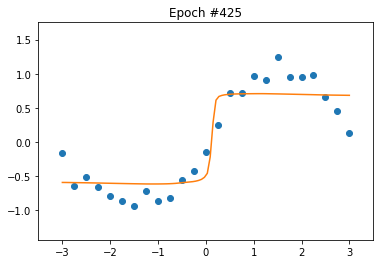

In [ ]:
new_model = Model(1, 'deep_sine_fit_dropout')
new_model.train(x,y, epochs = 3000)
make_movie('./deep_sine_fit_dropout/', './deep_sine_fit_dropout/deep_sine_fit_dropout.mp4', 20)

# How Training Looks with Dropout

In [ ]:
HTML('<iframe width="800" height="721" src="https://www.youtube.com/embed/oxdv7W9_I4s" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Machine learning is just regression in very high dimensional space

# To apply machine learning you need to think about how to structure a real-world objective as an easy to optimize problem

# Modern Demonstrations of Machine learning 

## Image Classification

* Convolutional neural networks (CNNs) have shown remarkable performance in image classification
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/classification.jpg?raw=1" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/vgg16.png?raw=1" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
## Feature Vector
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/euclidian_space.jpg?raw=1" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
## Visualization of the latent space

**Definition: latent space** - a hidden mapping of a data space onto a "latent space" where similar datapoints are grouped together

## Visualization of the latent space

In [ ]:
IFrame(src='https://nicola17.github.io/tfjs-tsne-demo/', width=1000, height=1000)

# This is not just for simple problems

In [ ]:
IFrame(src='https://artsexperiments.withgoogle.com/tsnemap/', width=1000, height=1000)

# Image Classification
## Applicability in Medicine
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/nature21056-f4.jpg?raw=1" width="800">
<cite data-cite="7099837/ZBWQHJS2"></cite>

# Identifying object and segmentation

In [ ]:
IFrame(src='http://cocodataset.org/#home', width=1000, height=1000)

# Identifying object and segmentation

<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/Image_Segmenation.png?raw=1" width="800">

## Segmentation can be done in real time

In [ ]:
IFrame(src='https://2.bp.blogspot.com/-ioaFybzPJ04/WpW3bRaMWdI/AAAAAAAACZM/j4st8tHRYvoW4szUF5ql62dnI6SLhUKQACLcBGAs/s400/image1.gif', width=400, height=400)

## Segmentation can be done in real time

In [ ]:
HTML('<iframe width="900" height="592" src="https://www.youtube.com/embed/JgXVAio8iA8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Segmentation in Materials Science
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/Materials_Segmentation.webp?raw=1" width="800">
<cite data-cite="7099837/GYCAHE9F"></cite>

# Image Segmentation in Biology
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/Bio_segmentation.png?raw=1" width="800">
<cite data-cite="7099837/VWZVD5B8"></cite>

# Natural Language Processing
## Your Amazon Alexa/Siri/Google Assistant

In [ ]:
HTML('<iframe width="1231" height="1041" src="https://www.youtube.com/embed/D86YAoynYbA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Natural Language Processing
### Language is a sequence
Models for understanding language can be applied to temporally dependent data

<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/RNN_language%20explained.png?raw=1" width="800">

### Fake Shakespear Generation
```
VIOLA:
Why, Salisbury must find his flesh and thought
That which I am not aps, not a man and in fire,
To show the reining of the raven and the wars
To grace my hand reproach within, and not a fair are hand,
That Caesar and my goodly father's world;
When I was heaven of presence and our fleets,
We spare with hours, but cut thy council I am great,
Murdered and by thy master's ready there
My power to give thee but so much as hell:
Some service in the noble bondman here,
Would show him to her wine.

KING LEAR:
O, if you were a feeble sight, the courtesy of your law,
Your sight and several breath, will wear the gods
With his heads, and my hands are wonder'd at the deeds,
So drop upon your lordship's head, and your opinion
Shall be against your honour.
```

## This can be done in materials science

<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/NLP_Materials_1.webp?raw=1" width="800">
<cite data-cite="7099837/T9N2GPL4"></cite>

<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/NLP_Materials_2.webp?raw=1" width="800">
<cite data-cite="7099837/T9N2GPL4"></cite>

# Expanding what is language
* Language is just sequential information which conveys information $\rightarrow$ this is the same as spectra

In [ ]:
HTML('<iframe width="600" height="150" src="https://www.youtube.com/embed/3dpsd5gTv-8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Generative Models
* When you want to generate an example from a data distribution

### Could be a text Description
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/StackGAN1.png?raw=1" width="800">
<cite data-cite="7099837/9SR3FFZQ"></cite>

<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/StackGAN2.png?raw=1" width="800">
<cite data-cite="7099837/9SR3FFZQ"></cite>

## Could be a input image or a sketch
<img src="https://github.com/jagar2/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/blob/master/What%20Can%20you%20Do%20With%20Machine%20Learning/images/pix2pix.png?raw=1" width="800">
<cite data-cite="7099837/FSZA5QTS"></cite>

## Or a live updating semantic map

In [ ]:
IFrame(src='http://nvidia-research-mingyuliu.com/gaugan/', width=1400, height=400)

### Latent Transformations

In [5]:
IFrame(src='https://lh5.googleusercontent.com/vgwO-WM_gNVYZMbmd7e6oaK7B81CI6t0ndI82jphzMI75GVYkVimsh8HDk67k_gv_f0VzI7VJQ=w1280', width=1000, height=600)

# Reinforcement Learning

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/qv6UVOQ0F44" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## Planning Chemical Synthesis
<img src="https://uploads-ssl.webflow.com/5e84cc494473717749e1f5ad/5eb1b70a3f5f272ca8e25d6c_Figure.png" width="800">
<cite data-cite="7099837/D62ZJ2CR"></cite>